## Import libraries

In [19]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from utils_mvcp import *
import os
from tqdm import tqdm

## Read data

In [20]:
# Read IR reference library
reference_library_ir = pd.read_csv('data/reference_library_ir.csv')
del reference_library_ir['Unnamed: 0']
reference_library_ir.head()

,981.0,983.0,985.0,987.0,989.0,991.0,993.0,995.0,997.0,999.0,...,2935.0,2937.0,2939.0,2941.0,2943.0,2945.0,2947.0,2949.0,polymer,id
0,-0.447035,-0.421266,-0.467836,-0.372833,-0.145153,0.130042,0.189127,0.155498,0.205391,0.153876,...,-0.162135,-0.184067,-0.125119,-0.156042,-0.325459,-0.485258,-0.560874,-0.453119,sucrose,sucrose_1
1,-0.815085,-0.512456,-0.297874,-0.198960,-0.148931,-0.163417,-0.028107,0.146969,0.169685,0.146503,...,0.539630,0.695101,0.536316,0.383972,0.450476,0.388581,0.130656,-0.055195,sucrose,sucrose_2
2,-0.520710,-0.445017,-0.352656,-0.253250,-0.105821,-0.032574,-0.047475,0.040878,0.113861,0.036063,...,0.687416,0.513546,0.504413,0.530826,0.334982,0.236275,0.271718,0.302377,sucrose,sucrose_3
3,-0.402060,-0.424283,-0.528735,-0.530170,-0.446972,-0.325313,-0.381953,-0.499918,-0.383397,-0.093098,...,0.406127,0.408948,0.676919,0.604899,0.216317,-0.316316,-0.508559,-0.168447,sucrose,sucrose_6
4,-0.132373,0.052544,0.249514,0.420353,0.532474,0.611563,0.665630,0.695106,0.699343,0.662427,...,-0.309102,-0.318836,-0.336464,-0.372207,-0.418736,-0.449632,-0.484169,-0.506637,sucrose,sucrose_7


In [21]:
# Read Raman reference library
reference_library_raman = pd.read_csv('data/reference_library_raman.csv')
del reference_library_raman['Unnamed: 0']
reference_library_raman.head()

,601.0,603.0,605.0,607.0,609.0,611.0,613.0,615.0,617.0,619.0,...,3485.0,3487.0,3489.0,3491.0,3493.0,3495.0,3497.0,3499.0,polymer,id
0,-0.506147,-0.499723,-0.582608,-0.731716,-0.598197,-0.448783,-0.636773,-0.755810,-0.755810,-0.641199,...,-0.755810,-0.755810,-0.741678,-0.620830,-0.592120,-0.712959,-0.755810,-0.755810,sucrose,sucrose_1
1,-0.450063,-0.590177,-0.649835,-0.649835,-0.649835,-0.634710,-0.487297,-0.404410,-0.432918,-0.518465,...,-0.649835,-0.649835,-0.649835,-0.649835,-0.649835,-0.649835,-0.649835,-0.649835,sucrose,sucrose_2
2,-0.320259,-0.302999,-0.317852,-0.356516,-0.322071,-0.284543,-0.343307,-0.418927,-0.523647,-0.562291,...,-0.562291,-0.562291,-0.562291,-0.562291,-0.524984,-0.427121,-0.455576,-0.553439,sucrose,sucrose_3
3,-0.345832,-0.359101,-0.440313,-0.571904,-0.593167,-0.583431,-0.488538,-0.463257,-0.558150,-0.537576,...,-0.593167,-0.506367,-0.414286,-0.395483,-0.429819,-0.550406,-0.593167,-0.593167,sucrose,sucrose_6
4,-0.071468,-0.095555,-0.102541,-0.096847,-0.087879,-0.083848,-0.128515,-0.154416,-0.147918,-0.121973,...,-0.270475,-0.300866,-0.323221,-0.319960,-0.316570,-0.312970,-0.301601,-0.285964,sucrose,sucrose_7


In [22]:
# Read calibration IR data

ir_spectra_cal = pd.read_csv('data/ir_spectra_cal.csv')
del ir_spectra_cal['Unnamed: 0']

# Read test IR data

ir_spectra_test = pd.read_csv('data/ir_spectra_val.csv')
del ir_spectra_test['Unnamed: 0']


# Read calibration Raman data

raman_spectra_cal = pd.read_csv('data/raman_spectra_cal.csv')
del raman_spectra_cal['Unnamed: 0']

# Read test Raman data

raman_spectra_test = pd.read_csv('data/raman_spectra_val.csv')
del raman_spectra_test['Unnamed: 0']



## Process spectral data

In [23]:
(x_train_ir, x_train_raman, 
 label_train_IR, label_train_Raman, 
 x_ir_cal, x_raman_cal, 
 label_ir_cal, label_raman_cal, 
 label_table) = process_data(
                        reference_library_ir,                                            
                        reference_library_raman,
                        ir_spectra_cal,
                        raman_spectra_cal
                        )


(_, _, 
 _, _, 
 x_ir_test, x_raman_test, 
 label_ir_test, label_raman_test, 
 _) = process_data(
                reference_library_ir,                                            
                reference_library_raman,
                ir_spectra_test,
                raman_spectra_test
                )

## Calculate HQI

In [24]:
# Nearest Neighbor

# Calculate HQI for calibration IR data
smx_all_IR_cal = 1-smx_nn(x_train_ir, x_ir_cal, label_train_IR, tau=1.4427)

# Calculate HQI for test Raman data
smx_all_Raman_cal = 1-smx_nn(x_train_raman, x_raman_cal, label_train_Raman, tau=1.4427)

score_list_cal = [smx_all_IR_cal, smx_all_Raman_cal]

# Calculate HQI for calibration IR data
smx_all_IR_test = 1-smx_nn(x_train_ir, x_ir_test, label_train_IR, tau=1.4427)

# Calculate HQI for test Raman data
smx_all_Raman_test = 1-smx_nn(x_train_raman, x_raman_test, label_train_Raman, tau=1.4427)

score_list_test = [smx_all_IR_test, smx_all_Raman_test]

## Perform Conformal Prediction over the test set

In [35]:
K = 2
seed = 0
shape_prop = .2
alpha = .1
U_list = gen_u(K, seed=0)

(score_list_shape, 
 labels_shape,
 score_list_size, 
 labels_size) = mvcp_split(score_list_cal, 
                          label_ir_cal, 
                          shape_prop, seed)

prediction_sets, empirical_confidence, _ = mvcp_2(
                                                score_list_shape,
                                                labels_shape,
                                                score_list_size,
                                                labels_size,
                                                score_list_test,
                                                alpha, 
                                                label_ir_test,
                                                U=U_list[0]
                                                )

In [34]:
if empirical_confidence is not None:
    print('Empirical confidence: '+str(int(100*empirical_confidence)/100))
print('Mean prediction set size: '+str(np.round(prediction_sets.sum(1).mean(), 2)))

Empirical confidence: 0.88
Mean prediction set size: 0.94


Enveloped used: 


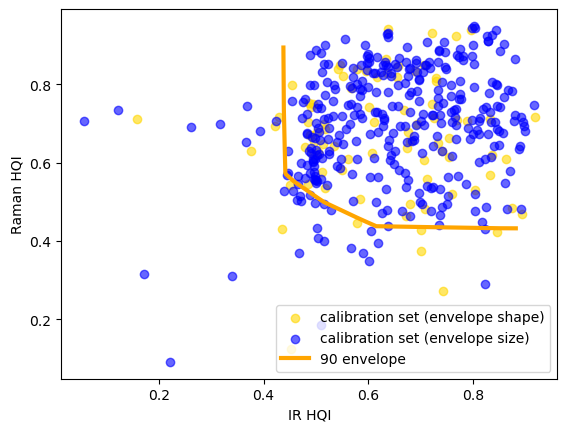

In [27]:
print('Enveloped used: ')
env_res = envelope(quant_smx_list, 
            quant_labels, 
            cal_smx_list,
            cal_labels,
            alpha, 
            label_table, 
            plot=True)

In [28]:
prediction_sets_n = [list(label_table.loc[ps,'polymer']) for ps in prediction_sets]
prediction_sets_size = np.array([len(ps) for ps in prediction_sets_n])

In [29]:
zero_label = np.where(prediction_sets_size == 0)[0]
single_label = np.where(prediction_sets_size == 1)[0]
mult_label = np.where(prediction_sets_size > 1)[0]

print('Sets with zero labels: ' + str(zero_label.shape[0]))
print('Sets with one label: ' + str(single_label.shape[0]))
print('Sets with >1 labels: ' + str(mult_label.shape[0]))

Sets with zero labels: 9
Sets with one label: 99
Sets with >1 labels: 0


In [37]:
output = [prediction_sets_n[i][0] if i in single_label else 
          '--outlier--' if i in zero_label else 
          '--manual check!--' for i in range(ir_spectra_test.shape[0])]
output_df = pd.DataFrame({'id':ir_spectra_test['id'],
                          'prection_set':prediction_sets_n,
                          'output':output})

output_df

,id,prection_set,output
0,mix_std_1,[NH2SO4],NH2SO4
1,mix_std_2,[sucrose],sucrose
2,mix_std_11,[],--outlier--
3,mix_std_14,[sucrose],sucrose
4,mix_std_16,[NH2SO4],NH2SO4
...,...,...,...
103,mix_574,[PSL],PSL
104,mix_590,[PSL],PSL
105,mix_602,[PSL],PSL
106,mix_606,[PSL],PSL
